<h2> Diabetes prediction using supervised machine learning

# Data Preparation

## Upload Files

Sumber Dataset:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

In [ ]:
from google.colab import files

# Upload kaggle.json manually
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

## Read Dataset

In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv("diabetes.csv")

# Data Exploration

## 1. Initial Data Examination

Menampilkan 5 baris pertama, 5 baris terakhir, dan 5 sample data secara acak

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
640,0,102,86,17,105,29.3,0.695,27,0
490,2,83,65,28,66,36.8,0.629,24,0
561,0,198,66,32,274,41.3,0.502,28,1
471,0,137,70,38,0,33.2,0.170,22,0
233,4,122,68,0,0,35.0,0.394,29,0


Melihat informasi tipe data tiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset ini terdiri dari 768 entri dengan 9 kolom. Semua kolom memiliki jumlah data yang lengkap (tidak ada nilai null). Terdapat 7 kolom bertipe integer (int64) dan 2 kolom bertipe float (float64).

## 2. Duplicate Rows Check

In [ ]:
df.duplicated().sum()

np.int64(0)

Dapat kita lihat dari hasil diatas, dataset ini tidak mimiliki nilai duplikat

## 3. Summary Statistics

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Berdasarkan tabel diatas bahwa rata-rata nilai glukosa, tekanan darah, dan BMI menunjukkan kecenderungan umum populasi, namun terdapat nilai nol yang tidak realistis pada beberapa fitur seperti Glucose, BloodPressure, dan Insulin, yang mungkin menandakan data hilang atau perlu diproses lebih lanjut. Rentang nilai yang luas dan standar deviasi yang cukup besar menunjukkan adanya variabilitas tinggi dalam data.

## 4. Identify Missing Values and Zero Values

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
def count_zeros_and_missing(df, exclude_columns=["Outcome"]):
    """Menghitung jumlah nilai 0 dan missing values (NaN) di setiap kolom DataFrame."""
    df_filtered = df.drop(columns=exclude_columns, errors="ignore")  # Hapus kolom yang dikecualikan dari analisis
    zero_counts = (df_filtered == 0).sum()  # Hitung jumlah 0 di setiap kolom
    missing_counts = df_filtered.isna().sum()  # Hitung jumlah missing values (NaN) di setiap kolom

    # Gabungkan hasil dalam DataFrame baru
    result = pd.DataFrame({
        "Zero Count": zero_counts,
    })
    return result

count_zeros_and_missing(df)

,Zero Count
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


## 5. Check for Outliers

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Tampilkan jumlah outlier
print("Jumlah outlier sebelum penghapusan:")
print(df.apply(detect_outliers_iqr).sum())

Jumlah outlier sebelum penghapusan:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


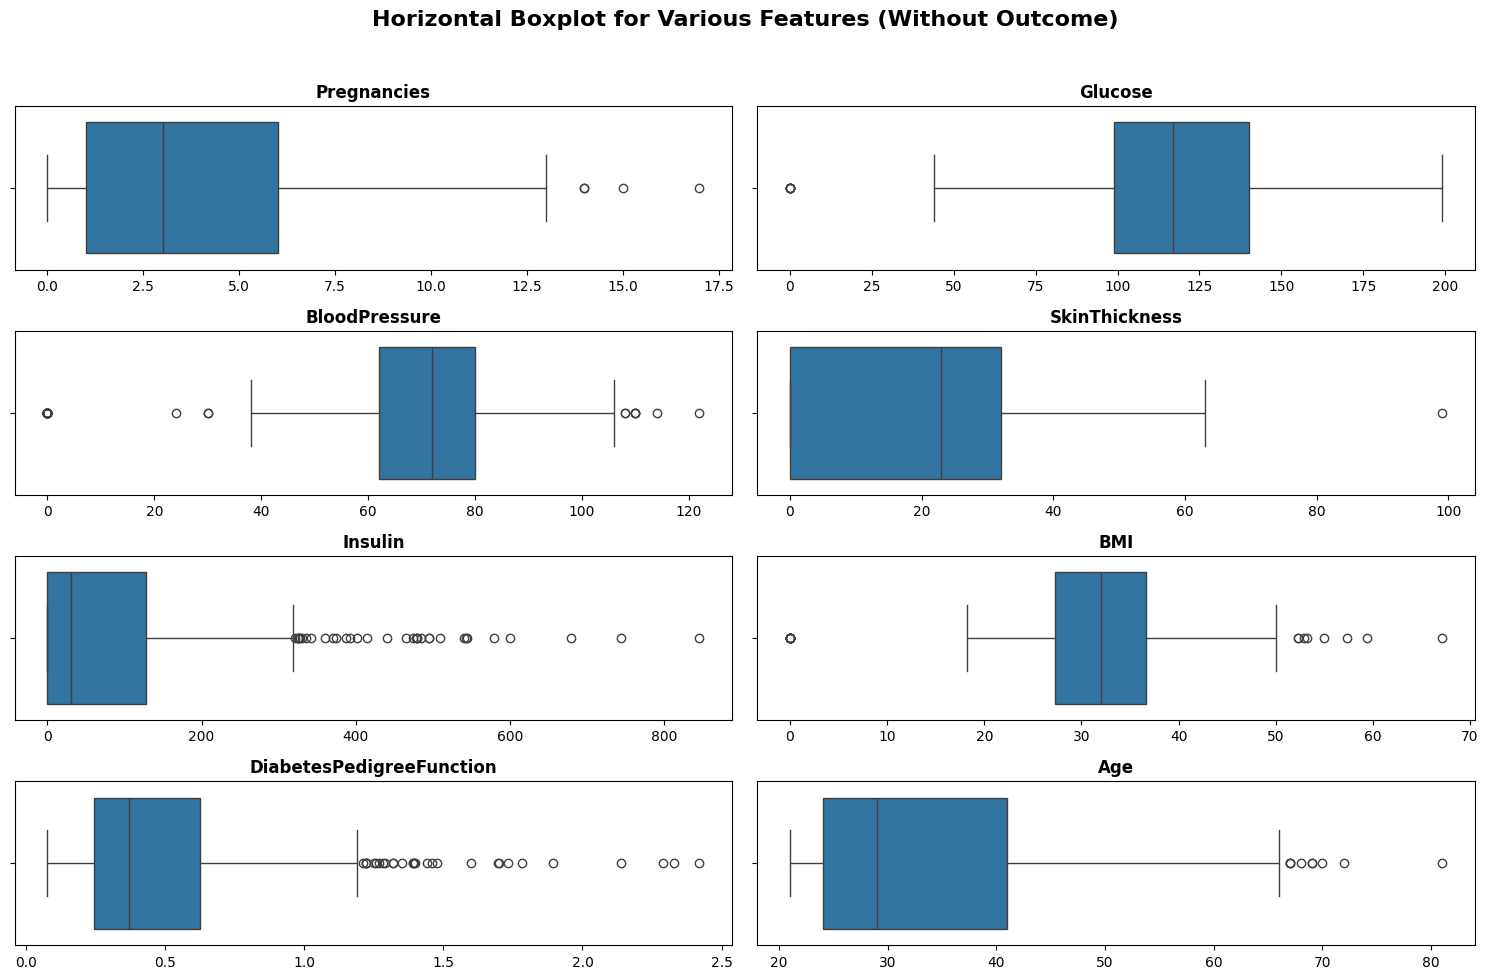

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghapus kolom Outcome dari DataFrame
df_no_outcome = df.drop(columns=["Outcome"])

# Membuat boxplot horizontal
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
fig.suptitle("Horizontal Boxplot for Various Features (Without Outcome)", fontsize=16, fontweight="bold")

# Plot setiap fitur dalam subplot
for i, (col, ax) in enumerate(zip(df_no_outcome.columns, axes.flat)):
    sns.boxplot(ax=ax, x=df_no_outcome[col])  # Menggunakan x untuk horizontal
    ax.set_title(col, fontsize=12, fontweight="bold")
    ax.set_xlabel("")  # Menghapus label sumbu X agar lebih bersih

# Menyembunyikan subplot kosong jika ada
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Agar tidak bertabrakan dengan judul utama
plt.show()


Berdasarkan boxen plot dari berbagai fitur dalam dataset (tanpa mempertimbangkan outcome), beberapa kesimpulan yang dapat ditarik adalah:

Terdapat Outlier di Beberapa Fitur

* Hampir semua fitur memiliki outlier yang terlihat sebagai titik di luar rentang utama.
* Fitur Pregnancies, Insulin, Age, DiabetesPedigreeFunction, dan SkinThickness menunjukkan keberadaan outlier yang cukup signifikan.

Distribusi Data Beragam

* Glucose, BloodPressure, dan BMI tampak memiliki distribusi yang lebih simetris, meskipun tetap ada beberapa nilai ekstrem.
* Insulin menunjukkan distribusi yang sangat menceng ke kanan (right-skewed), yang berarti ada beberapa individu dengan kadar insulin yang jauh lebih tinggi dibandingkan mayoritas lainnya.

Variasi Rentang Nilai Antar Fitur

* Beberapa fitur seperti Glucose, Insulin, dan Age memiliki rentang yang lebih luas dibandingkan fitur lainnya.
* DiabetesPedigreeFunction memiliki skala yang lebih kecil dibandingkan fitur lainnya, menunjukkan bahwa nilainya lebih terpusat dalam rentang yang terbatas.

## 6. Check Korelasi Antar Fitur Dataset

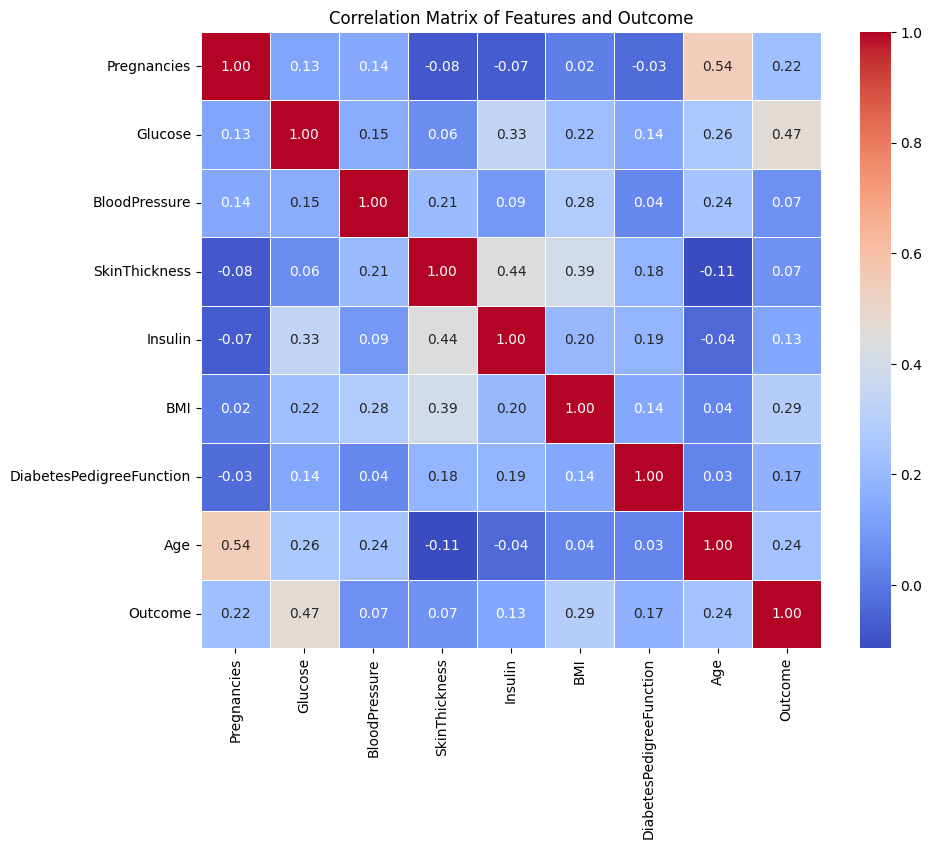

In [ ]:
import seaborn as sns
# Hitung correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features and Outcome")
plt.show()

Berdasarkan Correlation Matrix diatas dapat ditarik kesimpulan :

* Fitur seperti Glucose, BMI, Age, dan Pregnancies lebih penting untuk prediksi diabetes karena korelasinya lebih tinggi.
* BloodPressure dan SkinThickness mungkin kurang signifikan dan dapat dipertimbangkan untuk dihapus atau diuji lebih lanjut apakah meningkatkan performa model.

## 7. Check Distribusi Data Masing-Masing Fitur

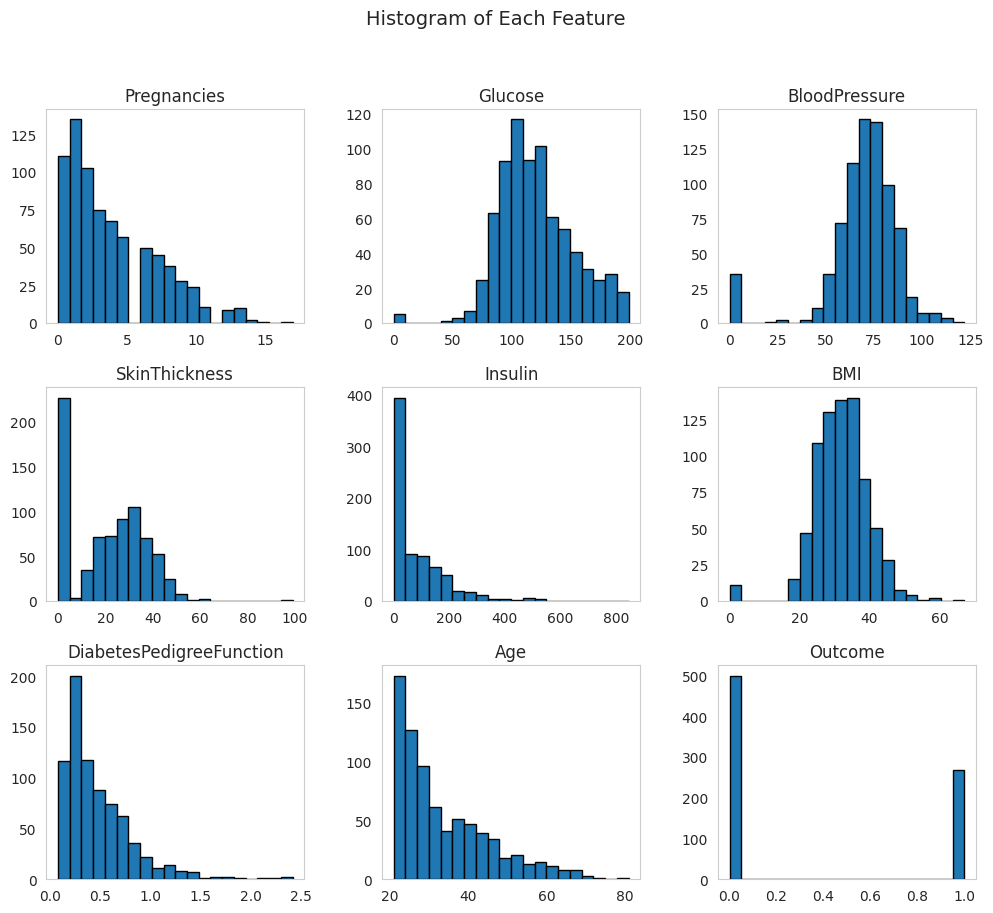

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Plot histogram untuk setiap fitur
df.hist(figsize=(12, 10), bins=20, edgecolor='black', grid=False)
plt.suptitle("Histogram of Each Feature", fontsize=14)
plt.show()

<Figure size 1000x800 with 0 Axes>

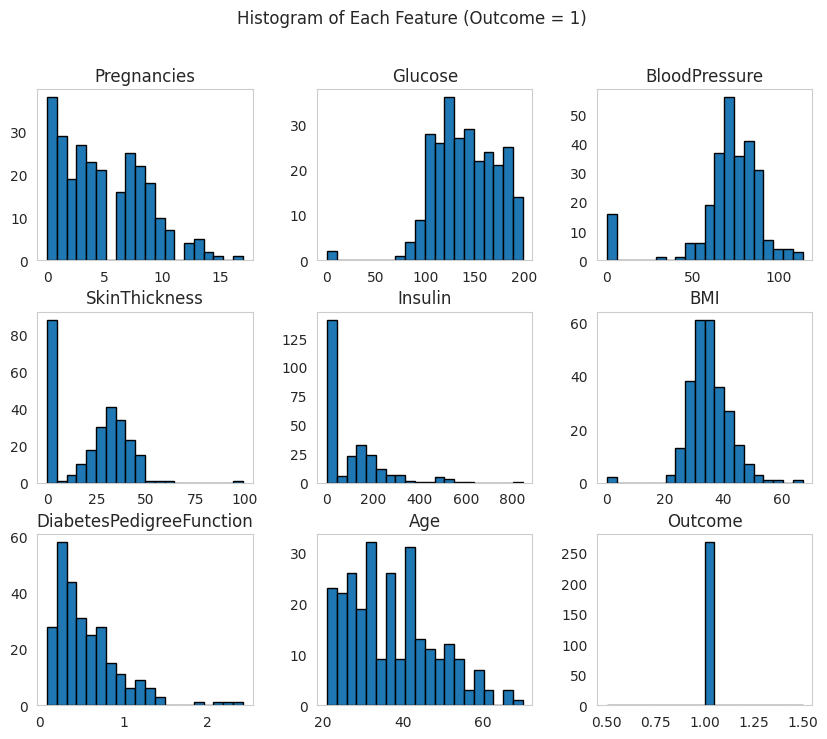

<Figure size 1000x800 with 0 Axes>

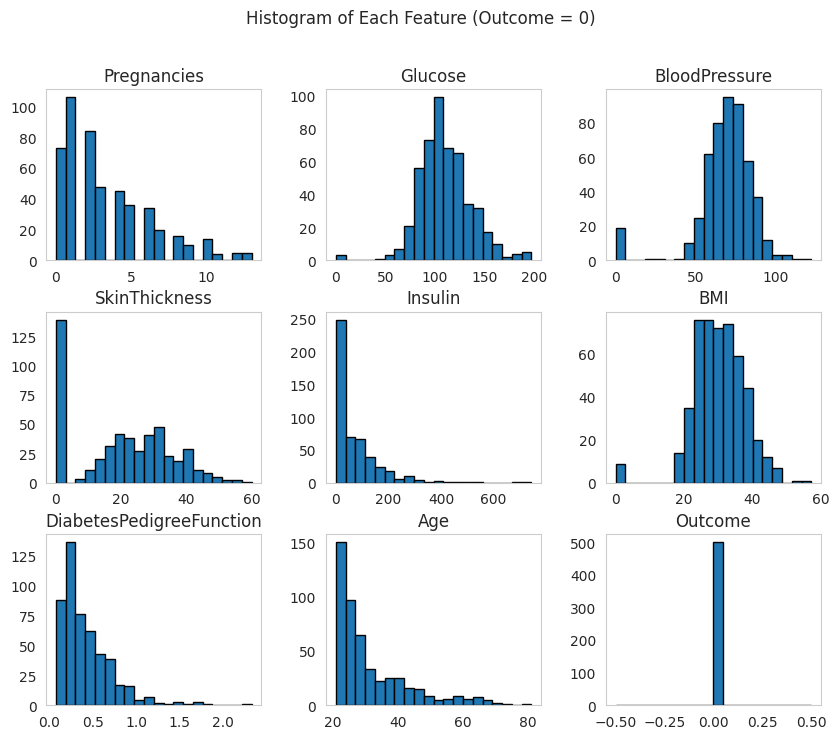

In [ ]:
# Plot histogram terpisah untuk Outcome 0 dan Outcome 1
outcomes = df['Outcome'].unique()

for outcome in outcomes:
    plt.figure(figsize=(10, 8))
    subset = df[df['Outcome'] == outcome]
    subset.hist(figsize=(10, 8), bins=20, edgecolor='black', grid=False)
    plt.suptitle(f"Histogram of Each Feature (Outcome = {outcome})", fontsize=12)
    plt.show()

## 8. Cek Jumlah Masing-masing Kelas

<ipython-input-22-34ba61a8ecaf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Outcome', data=df, palette='pastel', edgecolor='black')


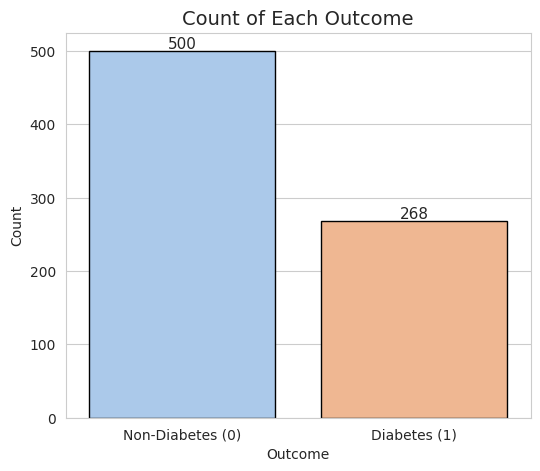

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))

# Simpan plot ke dalam variabel ax
ax = sns.countplot(x='Outcome', data=df, palette='pastel', edgecolor='black')

plt.title("Count of Each Outcome", fontsize=14)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0, 1], labels=["Non-Diabetes (0)", "Diabetes (1)"])

# Menambahkan label jumlah di atas setiap bar, untuk semua container
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11)

plt.show()

Berdasarkan plot tersebut, dapat ditarik beberapa kesimpulan berikut:


Distribusi Data Tidak Seimbang


*   Jumlah sampel dengan outcome Non-Diabetes (0) lebih banyak dibandingkan dengan sampel yang memiliki outcome Diabetes (1).
*   Hal ini menunjukkan adanya ketidakseimbangan kelas (class imbalance) dalam dataset.




Potensi Pengaruh pada Model Machine Learning

*  Jika dataset ini digunakan untuk membangun model klasifikasi, model cenderung lebih baik dalam mengenali kelas mayoritas (Non-Diabetes) dibandingkan kelas minoritas (Diabetes).
*  Ketidakseimbangan ini dapat menyebabkan model kurang akurat dalam mendeteksi kasus diabetes karena jumlah contoh yang lebih sedikit.


# Data Preprocessing

## 1. Data Cleaning

In [ ]:
import pandas as pd

def remove_rows_with_zeros(df, exclude_columns=["Outcome","Pregnancies"]):
    df_filtered = df.copy()  # Salin DataFrame agar tidak mengubah aslinya
    columns_to_check = [col for col in df.columns if col not in exclude_columns]  # Pilih kolom yang diperiksa

    df_cleaned = df_filtered[(df_filtered[columns_to_check] != 0).all(axis=1)]  # Hapus baris dengan nilai 0

    return df_cleaned

# Hitung distribusi outcome sebelum penghapusan
outcome_before = df["Outcome"].value_counts()

# Bersihkan dataset dari baris dengan nilai nol di fitur (kecuali "Outcome")
df_cleaned = remove_rows_with_zeros(df)

# Hitung distribusi outcome setelah penghapusan
outcome_after = df_cleaned["Outcome"].value_counts()

# Cek jumlah data sebelum dan sesudah
print(f"Jumlah data sebelum: {df.shape[0]}")
print(f"Jumlah data setelah: {df_cleaned.shape[0]}")

# Menampilkan distribusi outcome sebelum dan sesudah
print("\nDistribusi Outcome sebelum penghapusan:")
print(outcome_before)

print("\nDistribusi Outcome setelah penghapusan:")
print(outcome_after)

Jumlah data sebelum: 768
Jumlah data setelah: 392

Distribusi Outcome sebelum penghapusan:
Outcome
0    500
1    268
Name: count, dtype: int64

Distribusi Outcome setelah penghapusan:
Outcome
0    262
1    130
Name: count, dtype: int64


In [ ]:
# dataframe untuk remove zero value(yang digunakan pada model)
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


## 2. EDA After Cleaning

### Checking for Outlier

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Tampilkan jumlah outlier
print("Jumlah outlier sebelum penghapusan:")
print(df_cleaned.apply(detect_outliers_iqr).sum())

Jumlah outlier sebelum penghapusan:
Pregnancies                 11
Glucose                      0
BloodPressure                7
SkinThickness                1
Insulin                     25
BMI                          6
DiabetesPedigreeFunction    12
Age                         13
Outcome                      0
dtype: int64


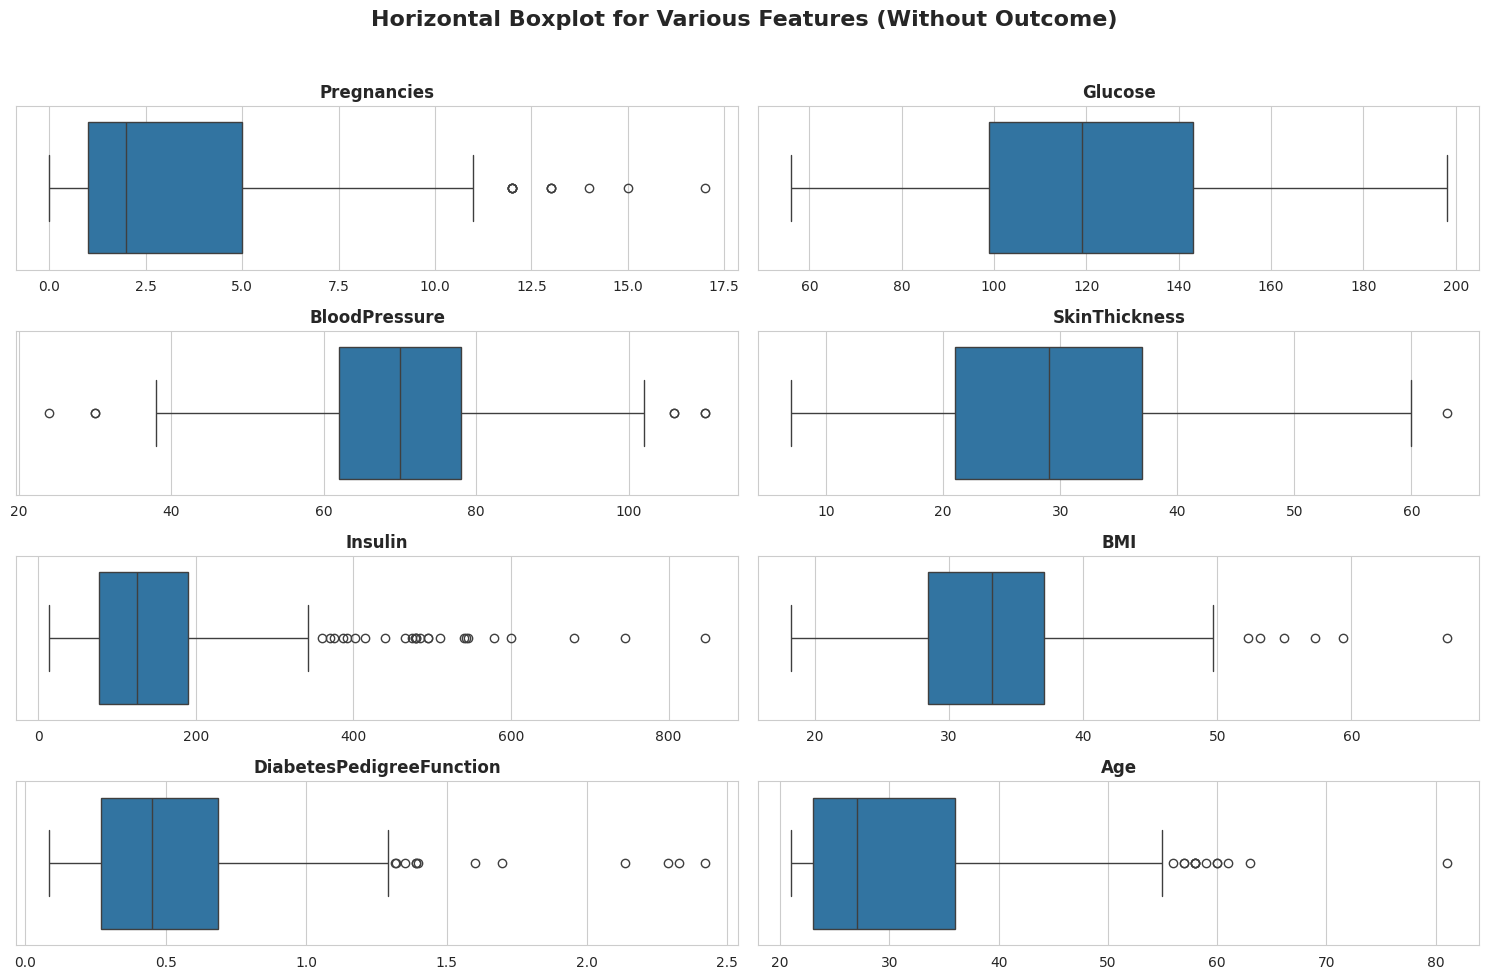

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghapus kolom Outcome dari DataFrame
df_no_outcome = df_cleaned.drop(columns=["Outcome"])

# Membuat boxplot horizontal
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
fig.suptitle("Horizontal Boxplot for Various Features (Without Outcome)", fontsize=16, fontweight="bold")

# Plot setiap fitur dalam subplot
for i, (col, ax) in enumerate(zip(df_no_outcome.columns, axes.flat)):
    sns.boxplot(ax=ax, x=df_no_outcome[col])  # Menggunakan x untuk horizontal
    ax.set_title(col, fontsize=12, fontweight="bold")
    ax.set_xlabel("")  # Menghapus label sumbu X agar lebih bersih

# Menyembunyikan subplot kosong jika ada
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Agar tidak bertabrakan dengan judul utama
plt.show()


Kesimpulan setelah data cleaning:

* Outlier berkurang secara signifikan di beberapa fitur, terutama pada BloodPressure, SkinThickness, Insulin, dan BMI.
* Distribusi lebih stabil, mencerminkan data yang lebih representatif tanpa nilai ekstrem yang berlebihan.
* Insulin masih memiliki beberapa outlier, menunjukkan kemungkinan perlunya penanganan lebih lanjut.
* Variabilitas tetap terjaga, tanpa kehilangan terlalu banyak informasi penting dari data asli.


### Check Korelasi Antar Fitur Dataset

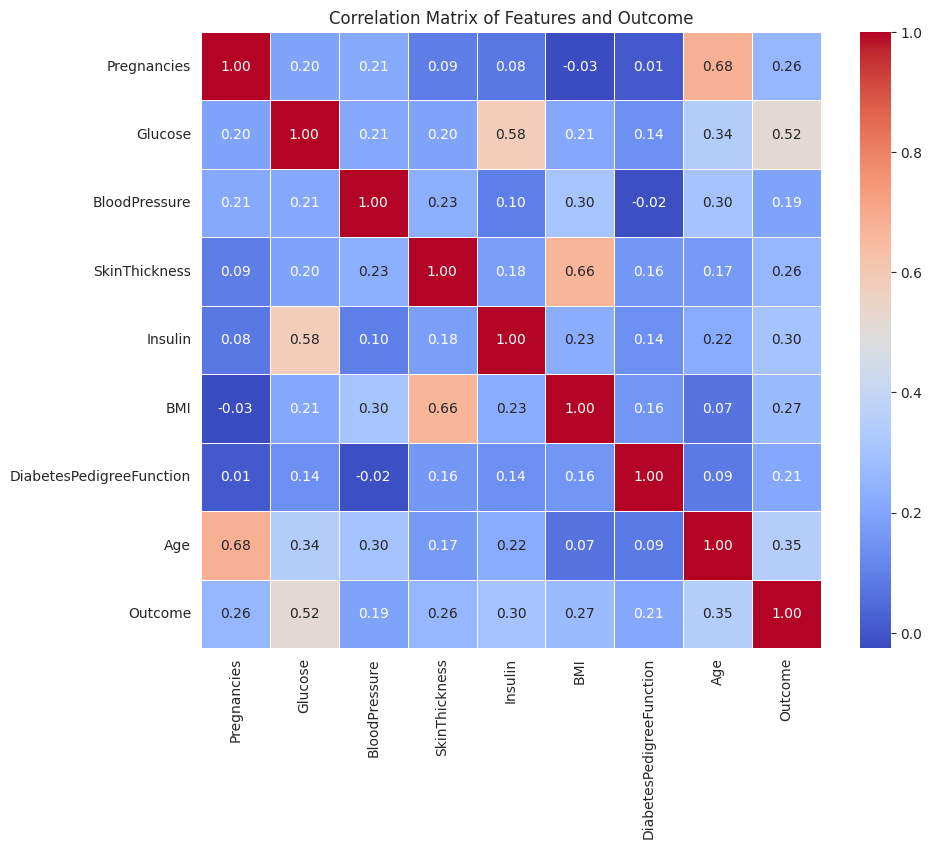

In [ ]:
import seaborn as sns
# Hitung correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features and Outcome")
plt.show()

### Check Distribusi Data Masing-Masing Fitur

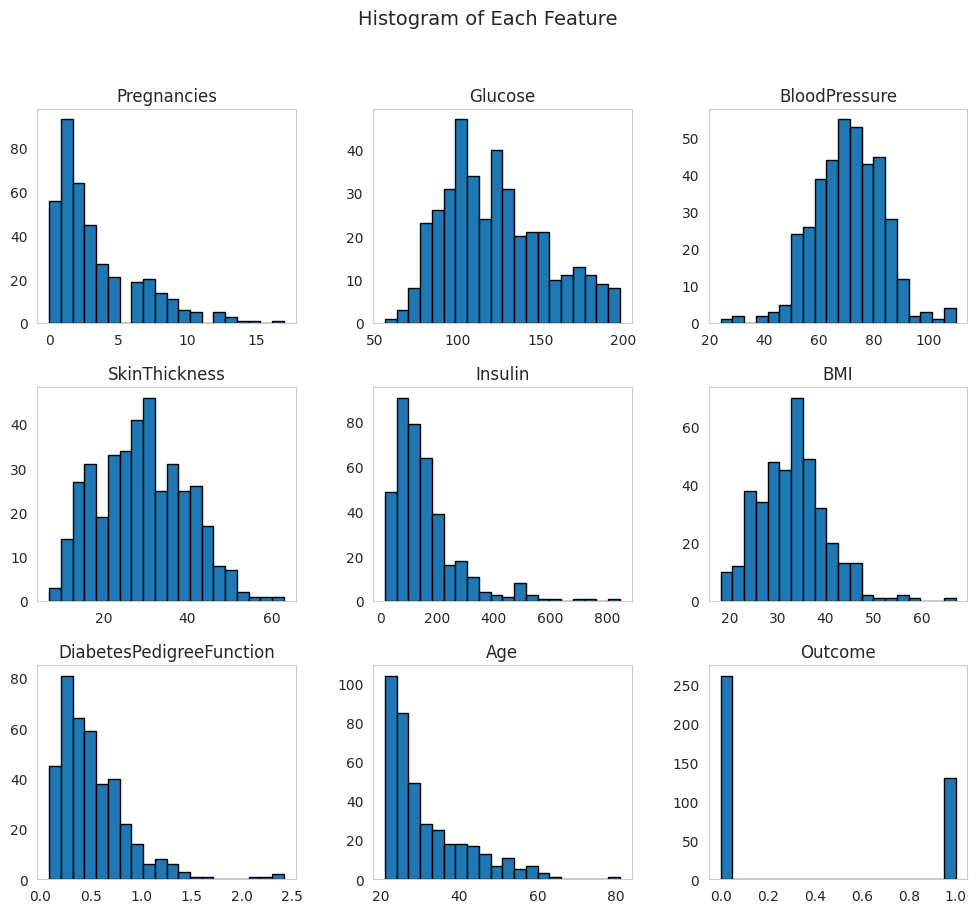

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Plot histogram untuk setiap fitur
df_cleaned.hist(figsize=(12, 10), bins=20, edgecolor='black', grid=False)
plt.suptitle("Histogram of Each Feature", fontsize=14)
plt.show()

<Figure size 1000x800 with 0 Axes>

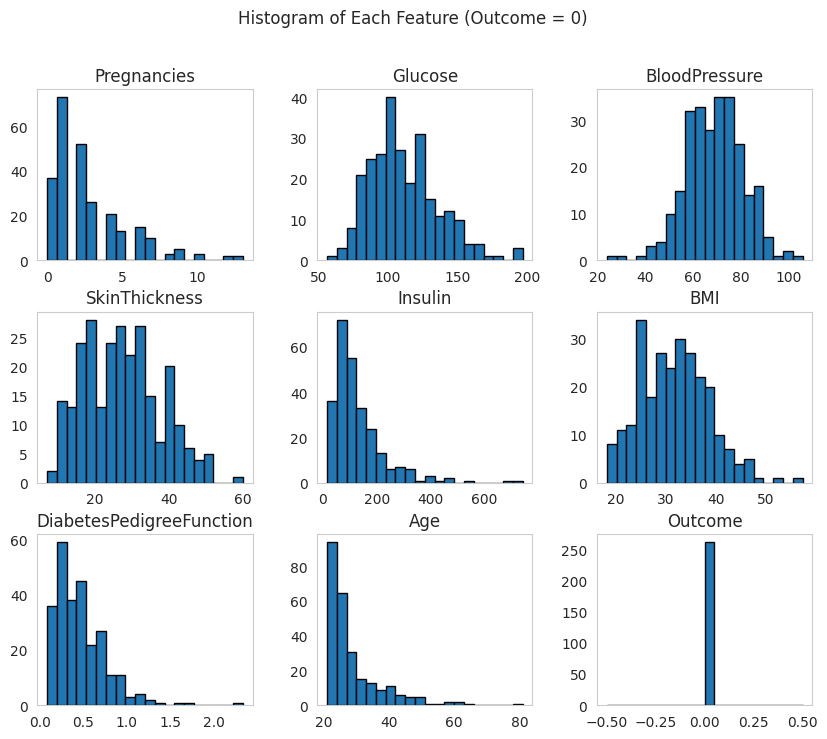

<Figure size 1000x800 with 0 Axes>

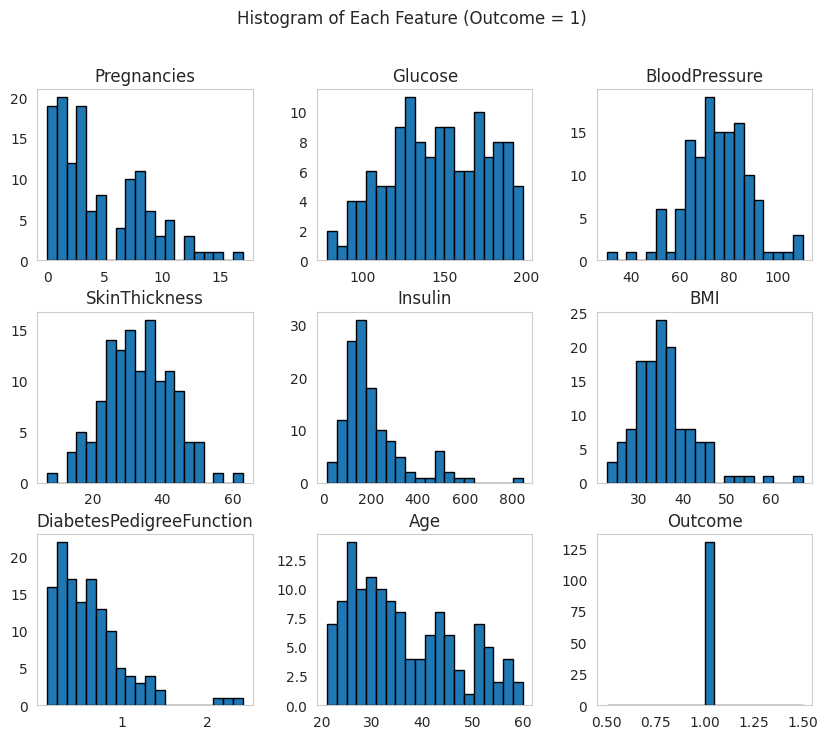

In [ ]:
# Plot histogram terpisah untuk Outcome 0 dan Outcome 1
outcomes = df_cleaned['Outcome'].unique()

for outcome in outcomes:
    plt.figure(figsize=(10, 8))
    subset = df_cleaned[df_cleaned['Outcome'] == outcome]
    subset.hist(figsize=(10, 8), bins=20, edgecolor='black', grid=False)
    plt.suptitle(f"Histogram of Each Feature (Outcome = {outcome})", fontsize=12)
    plt.show()

### Cek Jumlah Masing-masing Kelas

<ipython-input-30-140b7a2fb63c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_cleaned['Outcome'], palette='pastel', edgecolor='black')


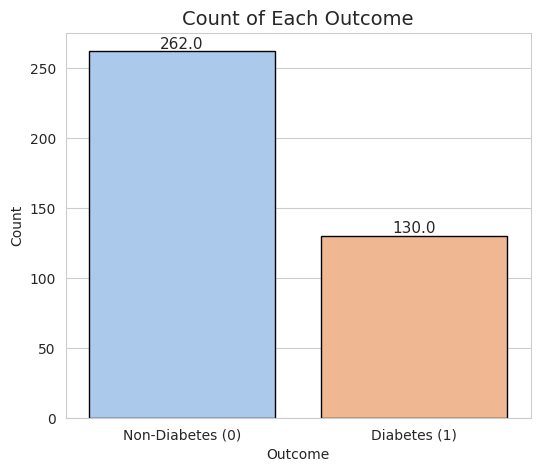

In [ ]:
# Plot barplot untuk visualisasi jumlah masing-masing outcome
plt.figure(figsize=(6, 5))
ax = sns.countplot(x=df_cleaned['Outcome'], palette='pastel', edgecolor='black')

plt.title("Count of Each Outcome", fontsize=14)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0, 1], labels=["Non-Diabetes (0)", "Diabetes (1)"])

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11)

plt.show()

Kesimpulan setelah pembersihan data:

* Peningkatan Korelasi: Beberapa fitur, seperti Glucose dan Outcome, memiliki korelasi yang lebih tinggi setelah pembersihan data, menunjukkan hubungan yang lebih jelas.
* Penurunan Noise: Korelasi antar fitur lebih stabil, misalnya antara Insulin dan Glucose, yang bisa meningkatkan keakuratan model.
* Hilangnya Data Anomali: Korelasi yang lebih logis menandakan bahwa outlier yang mengganggu telah dikurangi.
* Fitur dengan Dampak Kuat: Age, BMI, dan Glucose masih menjadi faktor utama yang berkorelasi dengan Outcome.
* Peningkatan Prediktabilitas: Data yang lebih bersih berpotensi meningkatkan performa model dalam mendeteksi diabetes.

## 2. Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_cleaned.drop("Outcome", axis=1)  # Fitur
y = df_cleaned["Outcome"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Distribusi kelas train sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas test sebelum SMOTE:", Counter(y_test))

Distribusi kelas train sebelum SMOTE: Counter({0: 209, 1: 104})
Distribusi kelas test sebelum SMOTE: Counter({0: 53, 1: 26})


## 3. Handling Imbalanced Data

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek()
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

Distribusi kelas setelah SMOTE: Counter({1: 200, 0: 200})


## 4. Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)

# Cek ukuran data
print("X_train shape:", X_train_normalized.shape)
print("y_train shape:", y_train_resampled.shape)
print("X_test shape:", X_test_normalized.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 8)
y_train shape: (400,)
X_test shape: (79, 8)
y_test shape: (79,)


# Modelling (Sesuai Paper)

## 1. K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train_normalized, y_train_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_normalized)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of KNN classifier: {accuracy_1:.4f}")
print(f"Precision of KNN classifier: {precision_1:.4f}")
print(f"Recall of KNN classifier: {recall_1:.4f}")
print(f"F1-score of KNN classifier: {f1_1:.4f}")

Accuracy of KNN classifier: 0.7342
Precision of KNN classifier: 0.5714
Recall of KNN classifier: 0.7692
F1-score of KNN classifier: 0.6557


## 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi dan latih model Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_normalized, y_train_resampled)

# Prediksi pada data uji
y_pred = nb_classifier.predict(X_test_normalized)

# Evaluasi model Naïve Bayes
accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Naive Bayes classifier: {accuracy_2:.4f}")
print(f"Precision of Naive Bayes classifier: {precision_2:.4f}")
print(f"Recall of Naive Bayes classifier: {recall_2:.4f}")
print(f"F1 Score of Naive Bayes classifier: {f1_2:.4f}")

Accuracy of Naive Bayes classifier: 0.7975
Precision of Naive Bayes classifier: 0.6471
Recall of Naive Bayes classifier: 0.8462
F1 Score of Naive Bayes classifier: 0.7333


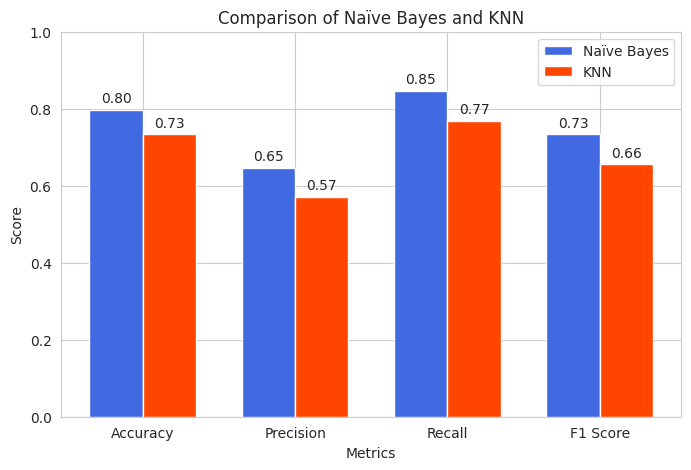

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Menyusun metrik evaluasi dalam array
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [accuracy_2, precision_2, recall_2, f1_2]  # Skor Naïve Bayes
knn_scores = [accuracy_1, precision_1, recall_1, f1_1]  # Skor KNN

# Set lebar bar dan posisi di sumbu x
x = np.arange(len(metrics))
width = 0.35  # Lebar bar

# Plot barplot perbandingan
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, nb_scores, width, label='Naïve Bayes', color='royalblue')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN', color='orangered')

# Labeling
ax.set_ylabel('Score')
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Naïve Bayes and KNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Menampilkan nilai di atas bar
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Offset text sedikit di atas batang
                textcoords="offset points",
                ha='center', va='bottom')

plt.ylim(0, 1)  # Batasi sumbu y antara 0 dan 1
plt.show()

## 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_normalized, y_train_resampled)

# Prediksi pada data uji
y_pred = dt_model.predict(X_test_normalized)

# Evaluasi model KNN
accuracy_3 = accuracy_score(y_test, y_pred)
precision_3 = precision_score(y_test, y_pred)
recall_3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Decision Tree classifier: {accuracy_3:.4f}")
print(f"Precision of Decision Tree classifier: {precision_3:.4f}")
print(f"Recall of Decision Tree classifier: {recall_3:.4f}")
print(f"F1-score of Decision Tree classifier: {f1_3:.4f}")

Accuracy of KNN classifier: 0.7342
Precision of KNN classifier: 0.5714
Recall of KNN classifier: 0.7692
F1-score of KNN classifier: 0.6557


## 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_normalized, y_train_resampled)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test_normalized)

# Evaluasi model KNN
accuracy_4 = accuracy_score(y_test, y_pred)
precision_4 = precision_score(y_test, y_pred)
recall_4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Random Forest classifier: {accuracy_4:.4f}")
print(f"Precision of Random Forest classifier: {precision_4:.4f}")
print(f"Recall of Random Forest classifier: {recall_4:.4f}")
print(f"F1-score of Random Forest classifier: {f1_4:.4f}")

Accuracy of Random Forest classifier: 0.7975
Precision of Random Forest classifier: 0.6562
Recall of Random Forest classifier: 0.8077
F1-score of Random Forest classifier: 0.7241


## 5. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_normalized, y_train_resampled)

# Prediksi pada data uji
y_pred = xgb_model.predict(X_test_normalized)

# Evaluasi model KNN
accuracy_5 = accuracy_score(y_test, y_pred)
precision_5 = precision_score(y_test, y_pred)
recall_5 = recall_score(y_test, y_pred)
f1_5 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Random Forest classifier: {accuracy_5:.4f}")
print(f"Precision of Random Forest classifier: {precision_5:.4f}")
print(f"Recall of Random Forest classifier: {recall_5:.4f}")
print(f"F1-score of Random Forest classifier: {f1_5:.4f}")

Accuracy of Random Forest classifier: 0.7722
Precision of Random Forest classifier: 0.6111
Recall of Random Forest classifier: 0.8462
F1-score of Random Forest classifier: 0.7097


## 6. SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_normalized, y_train_resampled)

# Prediksi pada data uji
y_pred = svm_model.predict(X_test_normalized)

# Evaluasi model KNN
accuracy_6 = accuracy_score(y_test, y_pred)
precision_6 = precision_score(y_test, y_pred)
recall_6 = recall_score(y_test, y_pred)
f1_6 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Random Forest classifier: {accuracy_6:.4f}")
print(f"Precision of Random Forest classifier: {precision_6:.4f}")
print(f"Recall of Random Forest classifier: {recall_6:.4f}")
print(f"F1-score of Random Forest classifier: {f1_6:.4f}")

Accuracy of Random Forest classifier: 0.7722
Precision of Random Forest classifier: 0.6250
Recall of Random Forest classifier: 0.7692
F1-score of Random Forest classifier: 0.6897


## 7. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_normalized, y_train_resampled)

# Prediksi pada data uji
y_pred = lr_model.predict(X_test_normalized)

# Evaluasi model KNN
accuracy_7 = accuracy_score(y_test, y_pred)
precision_7 = precision_score(y_test, y_pred)
recall_7 = recall_score(y_test, y_pred)
f1_7 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Random Forest classifier: {accuracy_7:.4f}")
print(f"Precision of Random Forest classifier: {precision_7:.4f}")
print(f"Recall of Random Forest classifier: {recall_7:.4f}")
print(f"F1-score of Random Forest classifier: {f1_7:.4f}")

Accuracy of Random Forest classifier: 0.8101
Precision of Random Forest classifier: 0.6667
Recall of Random Forest classifier: 0.8462
F1-score of Random Forest classifier: 0.7458


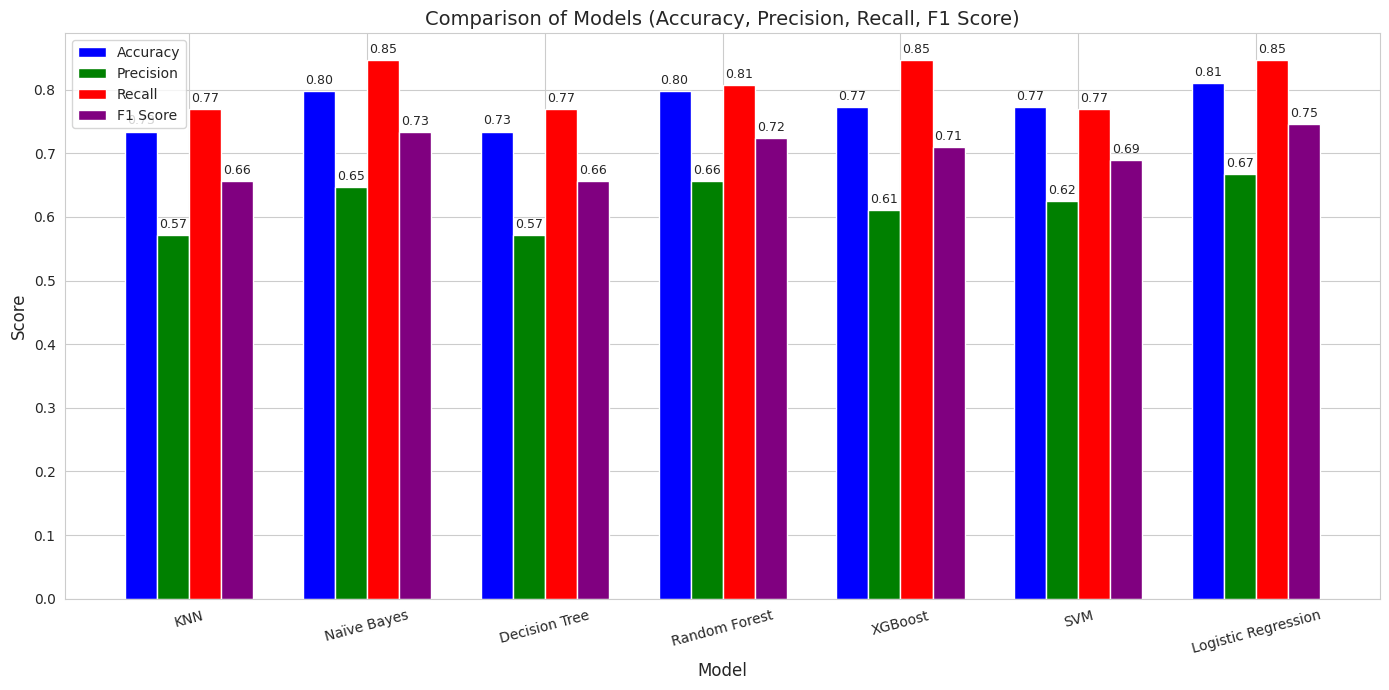

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nama model
models = ["KNN", "Naïve Bayes", "Decision Tree", "Random Forest", "XGBoost", "SVM", "Logistic Regression"]

# Lebar bar dan posisi
x = np.arange(len(models))
width = 0.18  # lebar bar disesuaikan agar tidak menumpuk

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='b')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='g')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='r')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='purple')

# Labeling
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Comparison of Models (Accuracy, Precision, Recall, F1 Score)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, fontsize=10)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Model Hyperparameter Tuning

## Hyperparameter Tuning (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.datasets import make_classification
#import catboost
# from catboost import CatBoostClassifier
#import SVM
from sklearn.svm import SVC

# ✅ Define hyperparameter grids for each model
param_grids = {
    "KNN": {
        "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "NaiveBayes": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "DecisionTree": {
        "max_depth": [5, 10, 20, None],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    "LogisticRegression": {
         "C": [0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 6, 9],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.7, 1.0],

}


models = {
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=100),
    "XGBoost": xgb.XGBClassifier(random_state=42, eval_metric="logloss"),
    # "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}


best_params = {}

for model_name, model in models.items():
    print(f"🔍 Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train_normalized, y_train_resampled)
    best_params[model_name] = grid_search.best_params_

print("\n🎯 Best Hyperparameters for Each Model:")
for model, params in best_params.items():
    print(f"{model}: {params}")

🔍 Tuning KNN...
🔍 Tuning NaiveBayes...
🔍 Tuning RandomForest...
🔍 Tuning DecisionTree...
🔍 Tuning SVM...
🔍 Tuning LogisticRegression...
🔍 Tuning XGBoost...

🎯 Best Hyperparameters for Each Model:
KNN: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
NaiveBayes: {'var_smoothing': 1e-09}
RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
DecisionTree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}
SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7}


Hyperparameter tuning digunakan sebagai proses untuk mencari kombinasi terbaik dari parameter model machine learning agar model tersebut memiliki performa optimal. Hyperparameter yang digunakan dalam hal ini adalah GridSearch. GridSearch dipilih karena dataset yang digunakan cukup kecil sehingga metode ini sudah cukup baik dalam mencari parameter terbaik.


##K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

knn_classifier = KNeighborsClassifier(**best_params["KNN"])

# Train the classifier on the training data
knn_classifier.fit(X_train_normalized, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naïve Bayes classifier
nb_classifier = GaussianNB(**best_params["NaiveBayes"])

# Train the model using the resampled dataset
nb_classifier.fit(X_train_normalized, y_train_resampled)

GaussianNB()

##Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(**best_params['DecisionTree'])
dt_model.fit(X_train_normalized, y_train_resampled)

DecisionTreeClassifier(max_depth=20, min_samples_split=5)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
rf_model = RandomForestClassifier(**best_params['RandomForest'])
rf_model.fit(X_train_normalized, y_train_resampled)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

##XgBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(**best_params['XGBoost'])
xgb_model.fit(X_train_normalized, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(**best_params['SVM'])
svm_model.fit(X_train_normalized, y_train_resampled)

SVC(C=10, gamma='auto')

##Logistic Regression

In [ ]:
lr_model = LogisticRegression(**best_params['LogisticRegression'])
lr_model.fit(X_train_normalized, y_train_resampled)

LogisticRegression(C=1)

# Cross Validation

## KNN Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores_knn = cross_val_score(knn_classifier, X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_knn = cross_val_score(knn_classifier, X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_knn = cross_val_score(knn_classifier, X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_knn = cross_val_score(knn_classifier, X_train_normalized, y_train_resampled, cv=cv, scoring='f1')

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_knn.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_knn.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_knn.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_knn.mean():.4f}")

Cross-validated Accuracy: 0.7900
Cross-validated Precision: 0.7704
Cross-validated Recall: 0.8350
Cross-validated F1-score: 0.7990


## Naive Bayes cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_nb = cross_val_score(nb_classifier,X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_nb = cross_val_score(nb_classifier,X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_nb = cross_val_score(nb_classifier,X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_nb = cross_val_score(nb_classifier,X_train_normalized, y_train_resampled, cv=cv, scoring='f1')

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_nb.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_nb.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_nb.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_nb.mean():.4f}")

Cross-validated Accuracy: 0.7650
Cross-validated Precision: 0.7874
Cross-validated Recall: 0.7350
Cross-validated F1-score: 0.7554


## Decision Tree cross validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_dt = cross_val_score(dt_model, X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_dt = cross_val_score(dt_model, X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_dt = cross_val_score(dt_model, X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_dt = cross_val_score(dt_model, X_train_normalized, y_train_resampled, cv=cv, scoring='f1')

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_dt.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_dt.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_dt.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_dt.mean():.4f}")

Cross-validated Accuracy: 0.8100
Cross-validated Precision: 0.7991
Cross-validated Recall: 0.8300
Cross-validated F1-score: 0.8128


## Random Forest cross validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_rf = cross_val_score(rf_model, X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_rf = cross_val_score(rf_model, X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_rf = cross_val_score(rf_model, X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_rf = cross_val_score(rf_model, X_train_normalized, y_train_resampled, cv=cv, scoring='f1')

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_rf.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_rf.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_rf.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_rf.mean():.4f}")

Cross-validated Accuracy: 0.8550
Cross-validated Precision: 0.8246
Cross-validated Recall: 0.9050
Cross-validated F1-score: 0.8615


## Xgboost cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

# K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi menggunakan cross-validation
accuracy_scores_xgb = cross_val_score(xgb_model, X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_xgb = cross_val_score(xgb_model, X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_xgb = cross_val_score(xgb_model, X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_xgb = cross_val_score(xgb_model, X_train_normalized, y_train_resampled, cv=cv, scoring='f1')

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_xgb.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_xgb.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_xgb.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_xgb.mean():.4f}")

Cross-validated Accuracy: 0.8450
Cross-validated Precision: 0.8271
Cross-validated Recall: 0.8750
Cross-validated F1-score: 0.8493


## SVM cross validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_svm = cross_val_score(svm_model, X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_svm = cross_val_score(svm_model, X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_svm = cross_val_score(svm_model, X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_svm = cross_val_score(svm_model, X_train_normalized, y_train_resampled, cv=cv, scoring='f1')  # Tambahan F1-score

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_svm.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_svm.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_svm.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_svm.mean():.4f}")

Cross-validated Accuracy: 0.8075
Cross-validated Precision: 0.7988
Cross-validated Recall: 0.8300
Cross-validated F1-score: 0.8119


## Logistic regression cross validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores_lr = cross_val_score(lr_model, X_train_normalized, y_train_resampled, cv=cv, scoring='accuracy')
precision_scores_lr = cross_val_score(lr_model, X_train_normalized, y_train_resampled, cv=cv, scoring='precision')
recall_scores_lr = cross_val_score(lr_model, X_train_normalized, y_train_resampled, cv=cv, scoring='recall')
f1_scores_lr = cross_val_score(lr_model, X_train_normalized, y_train_resampled, cv=cv, scoring='f1')  # Tambahan F1-score

# Menampilkan hasil cross-validation
print(f"Cross-validated Accuracy: {accuracy_scores_lr.mean():.4f}")
print(f"Cross-validated Precision: {precision_scores_lr.mean():.4f}")
print(f"Cross-validated Recall: {recall_scores_lr.mean():.4f}")
print(f"Cross-validated F1-score: {f1_scores_lr.mean():.4f}")  # Output F1-score

Cross-validated Accuracy: 0.7675
Cross-validated Precision: 0.7959
Cross-validated Recall: 0.7300
Cross-validated F1-score: 0.7582


# Hasil Test Set

## KNN

In [ ]:
# Pastikan knn_classifier model sudah dilatih sebelumnya
y_pred = knn_classifier.predict(X_test_normalized)

# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of KNN classifier: {accuracy_knn:.4f}")
print(f"Precision of KNN classifier: {precision_knn:.4f}")
print(f"Recall of KNN classifier: {recall_knn:.4f}")
print(f"F1-score of KNN classifier: {f1_knn:.4f}")

Accuracy of KNN classifier: 0.6962
Precision of KNN classifier: 0.5333
Recall of KNN classifier: 0.6154
F1-score of KNN classifier: 0.5714


## Naive Bayes

In [ ]:
# Pastikan nb_classifier model sudah dilatih sebelumnya
y_pred = nb_classifier.predict(X_test_normalized)

# Evaluate the model naive bayes
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Naive Bayes classifier: {accuracy_nb:.4f}")
print(f"Precision of Naive Bayes classifier: {precision_nb:.4f}")
print(f"Recall of Naive Bayes classifier: {recall_nb:.4f}")
print(f"F1 Score of Naive Bayes classifier: {f1_nb:.4f}")

Accuracy of Naive Bayes classifier: 0.7975
Precision of Naive Bayes classifier: 0.6471
Recall of Naive Bayes classifier: 0.8462
F1 Score of Naive Bayes classifier: 0.7333


## Decision Tree

In [ ]:
# Pastikan dt_model sudah dilatih sebelumnya
y_pred = dt_model.predict(X_test_normalized)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt= precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.4f}")
print(f"Precision of Decision Tree classifier: {precision_dt:.4f}")
print(f"Recall of Decision Tree classifier: {recall_dt:.4f}")
print(f"F1-score of Decision Tree classifier: {f1_dt:.4f}")

Accuracy of Decision Tree classifier: 0.6709
Precision of Decision Tree classifier: 0.5000
Recall of Decision Tree classifier: 0.6538
F1-score of Decision Tree classifier: 0.5667


## Random Forest

In [ ]:
# Pastikan rf_model sudah dilatih sebelumnya
y_pred = rf_model.predict(X_test_normalized)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Random Forest classifier: {accuracy_rf:.4f}")
print(f"Precision of Random Forest classifier: {precision_rf:.4f}")
print(f"Recall of Random Forest classifier: {recall_rf:.4f}")
print(f"F1-score of Random Forest classifier: {f1_rf:.4f}")

Accuracy of Random Forest classifier: 0.7848
Precision of Random Forest classifier: 0.6452
Recall of Random Forest classifier: 0.7692
F1-score of Random Forest classifier: 0.7018


## XgBoost

In [ ]:
# Pastikan xgb_model sudah dilatih sebelumnya
y_pred_prob = xgb_model.predict(X_test_normalized)
y_pred = (y_pred_prob > 0.5).astype(int)  # Konversi probabilitas ke label biner

# Evaluasi model XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of XGBoost classifier: {accuracy_xgb:.4f}")
print(f"Precision of XGBoost classifier: {precision_xgb:.4f}")
print(f"Recall of XGBoost classifier: {recall_xgb:.4f}")
print(f"F1-score of XGBoost classifier: {f1_xgb:.4f}")


Accuracy of XGBoost classifier: 0.8228
Precision of XGBoost classifier: 0.6765
Recall of XGBoost classifier: 0.8846
F1-score of XGBoost classifier: 0.7667


## SVM

In [ ]:
# Pastikan svm_model sudah dilatih sebelumnya
y_pred = svm_model.predict(X_test_normalized)

# Evaluasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of SVM classifier: {accuracy_svm:.4f}")
print(f"Precision of SVM classifier: {precision_svm:.4f}")
print(f"Recall of SVM classifier: {recall_svm:.4f}")
print(f"F1-score of SVM classifier: {f1_svm:.4f}")

Accuracy of SVM classifier: 0.6962
Precision of SVM classifier: 0.5333
Recall of SVM classifier: 0.6154
F1-score of SVM classifier: 0.5714


## Logistic Learning

In [ ]:
# Pastikan lr_model sudah dilatih sebelumnya
y_pred = lr_model.predict(X_test_normalized)

# Evaluasi model Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy of Logistic Regression classifier: {accuracy_lr:.4f}")
print(f"Precision of Logistic Regression classifier: {precision_lr:.4f}")
print(f"Recall of Logistic Regression classifier: {recall_lr:.4f}")
print(f"F1-score of Logistic Regression classifier: {f1_lr:.4f}")

Accuracy of Logistic Regression classifier: 0.8101
Precision of Logistic Regression classifier: 0.6667
Recall of Logistic Regression classifier: 0.8462
F1-score of Logistic Regression classifier: 0.7458


# Perbandingan Hasil CV dan Test

## Hasil Test Set

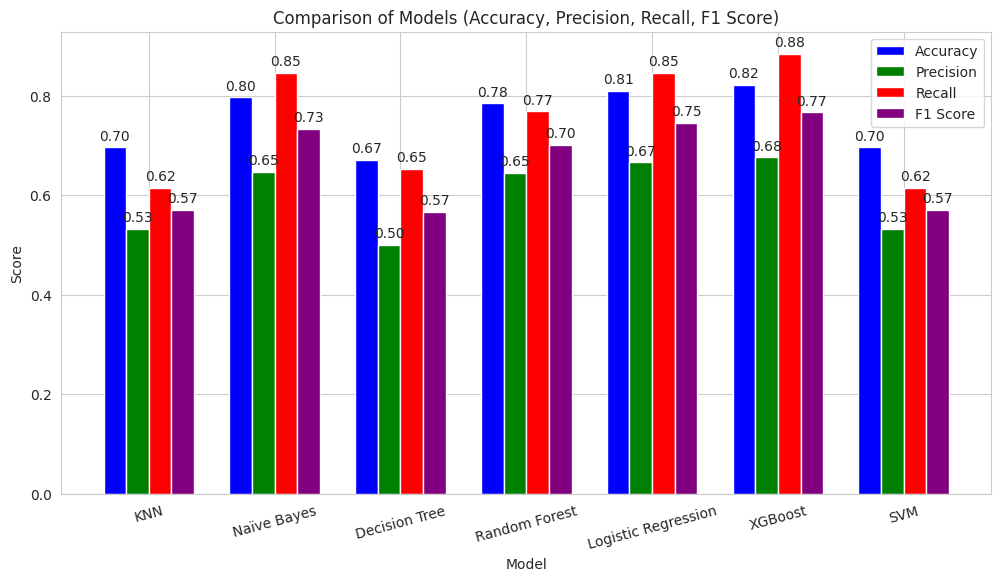

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nama model
models = ["KNN", "Naïve Bayes", "Decision Tree", "Random Forest", "Logistic Regression", "XGBoost", "SVM"]

# Metrix Evaluasi (Masukkan hasil cross-validation dari masing-masing model)
accuracy = [
    accuracy_knn, accuracy_nb, accuracy_dt,
    accuracy_rf, accuracy_lr, accuracy_xgb, accuracy_svm
]
precision = [
    precision_knn, precision_nb, precision_dt,
    precision_rf, precision_lr, precision_xgb, precision_svm
]
recall = [
    recall_knn, recall_nb, recall_dt,
    recall_rf, recall_lr, recall_xgb, recall_svm
]
f1_score = [
    f1_knn, f1_nb, f1_dt,
    f1_rf, f1_lr, f1_xgb, f1_svm
]

# Lebar bar dan posisi
x = np.arange(len(models))
width = 0.18

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='b')
bar2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='g')
bar3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='r')
bar4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='purple')

# Labeling
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Comparison of Models (Accuracy, Precision, Recall, F1 Score)")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset posisi teks
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

## Hasil Cross Validasi

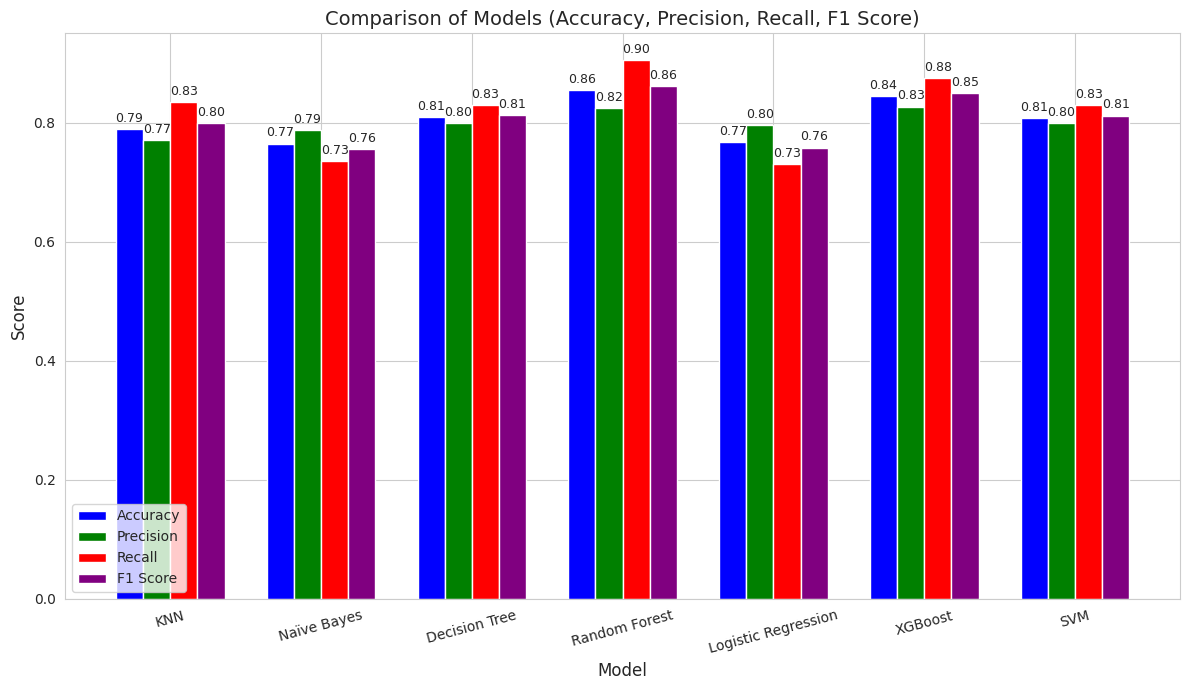

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nama model
models = ["KNN", "Naïve Bayes", "Decision Tree", "Random Forest", "Logistic Regression", "XGBoost", "SVM"]

# Metrix Evaluasi (Masukkan hasil cross-validation dari masing-masing model)
accuracy = [
    accuracy_scores_knn.mean(), accuracy_scores_nb.mean(), accuracy_scores_dt.mean(),
    accuracy_scores_rf.mean(), accuracy_scores_lr.mean(), accuracy_scores_xgb.mean(), accuracy_scores_svm.mean()
]
precision = [
    precision_scores_knn.mean(), precision_scores_nb.mean(), precision_scores_dt.mean(),
    precision_scores_rf.mean(), precision_scores_lr.mean(), precision_scores_xgb.mean(), precision_scores_svm.mean()
]
recall = [
    recall_scores_knn.mean(), recall_scores_nb.mean(), recall_scores_dt.mean(),
    recall_scores_rf.mean(), recall_scores_lr.mean(), recall_scores_xgb.mean(), recall_scores_svm.mean()
]
f1_score = [
    f1_scores_knn.mean(), f1_scores_nb.mean(), f1_scores_dt.mean(),
    f1_scores_rf.mean(), f1_scores_lr.mean(), f1_scores_xgb.mean(), f1_scores_svm.mean()
]


x = np.arange(len(models))
width = 0.18

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='b')
bar2 = ax.bar(x - 0.5 * width, precision, width, label='Precision', color='g')
bar3 = ax.bar(x + 0.5 * width, recall, width, label='Recall', color='r')
bar4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1 Score', color='purple')

# Labeling
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Comparison of Models (Accuracy, Precision, Recall, F1 Score)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Kesimpulan

### Kesimpulan Hasil:  
1. XGBoost merupakan model dengan akurasi tertinggi yaitu 82.28%, precision 68%, recall 88%, serta F1-score 76.67%.  
2. Model Naïve Bayes dan Logistic Regression menghasilkan angka yang tidak jauh berbeda dengan XGBoost.  
3. Decision Tree merupakan Model dengan Performa Terendah dibandingkan dengan model lainnya.

### Kesimpulan Penyebab Performa Test Set Lebih Rendah dari Cross-Validation  

1. *Overfitting pada Data Latihan*  
   - Model mungkin terlalu menyesuaikan diri dengan data latihan, sehingga kinerjanya tinggi pada cross-validation tetapi menurun pada test set yang benar-benar baru.  

2. *Jumlah Data Test Terbatas*  
   - Jumlah data original yang diberikan cukup sedikit, dengan kurang dari 1000 data sebelum dilakukan pra-pemrosesan. Hal ini membuat metrik evaluasi bisa lebih bervariasi dan tidak selalu mencerminkan performa sebenarnya.  

3. *Cross-Validation Menggunakan Data Lebih Banyak*  
   - Saat melakukan k-fold cross-validation, model dilatih pada sebagian besar data, sehingga memiliki lebih banyak informasi dibandingkan saat diuji pada test set yang lebih kecil.  

4. *Hyperparameter Tuning Berdasarkan Data Latih*  
   - Meskipun tuning telah dilakukan, improvisasi bisa saja menggunakan kombinasi hyperparameter yang tidak sesuai dengan karakteristik model atau data. Bisa jadi metode tuning yang digunakan (misalnya grid search) terbatas cakupannya dan tidak menemukan konfigurasi terbaik.